# Implementacja algorytmu

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from algorytm_PAM import cluster_PAM

In [2]:
X = pd.read_csv('X.csv')

# Generowanie zbioru danych

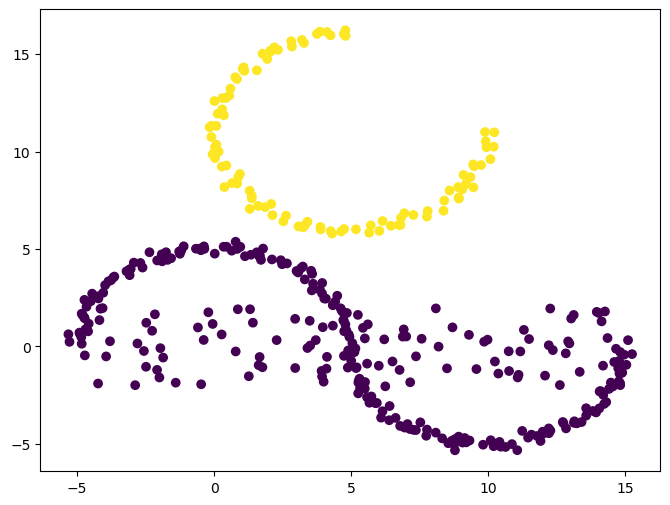

In [750]:
theta = np.linspace( 0, np.pi, 100) # tworzymy pókole po lewej
x_1 =  + 5 * np.cos(theta) + np.random.normal(0, 0.2, 100)
y_1 = 0 + 5 * np.sin(theta) + np.random.normal(0, 0.2, 100)

theta = np.linspace(np.pi, 2*np.pi, 100)# połkole po prawej
x_2 = 10 + 5 * np.cos(theta) + np.random.normal(0, 0.2, 100)
y_2 = 0 + 5 * np.sin(theta) + np.random.normal(0, 0.2, 100)

theta = np.linspace(np.pi/2,np.pi*2, 100) # pókole na górze
x_3 = 5 + 5 * np.cos(theta) + np.random.normal(0, 0.2, 100)
y_3 = 11 + 5 * np.sin(theta) + np.random.normal(0, 0.2, 100)

x_random = np.random.uniform(-5, 15, 100) #dodajemy szum wzdłuż prostej
y_random = np.random.uniform(-2, 2, 100) # kolejny szum

x = np.concatenate([x_1, x_2, x_3, x_random]) #łączymy wszystkie punkty
y = np.concatenate([y_1, y_2, y_3, y_random])

lab = labels = (
    [0] * (len(x_1) + len(x_2)) + 
    [1] * len(x_3) +  
    [0] * len(x_random) 
) # Podział na klastry nie jest tu jednoznaczny jednak zdecydowałem się na dwa klastry, jeden to półkole na górze a pozostałe punkty to drugi

Y = pd.DataFrame({'labels': lab,'X1': x, 'X2': y})

plt.figure(figsize=(8, 6));
plt.scatter(Y['X1'], Y['X2'], c=Y['labels']);

# Eksperyment na zbiorze X

In [729]:
medoids_pam, clusters_pam = cluster_PAM(X, 3)

In [742]:
kmeans = KMeans(n_clusters=3, random_state=17)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=17)

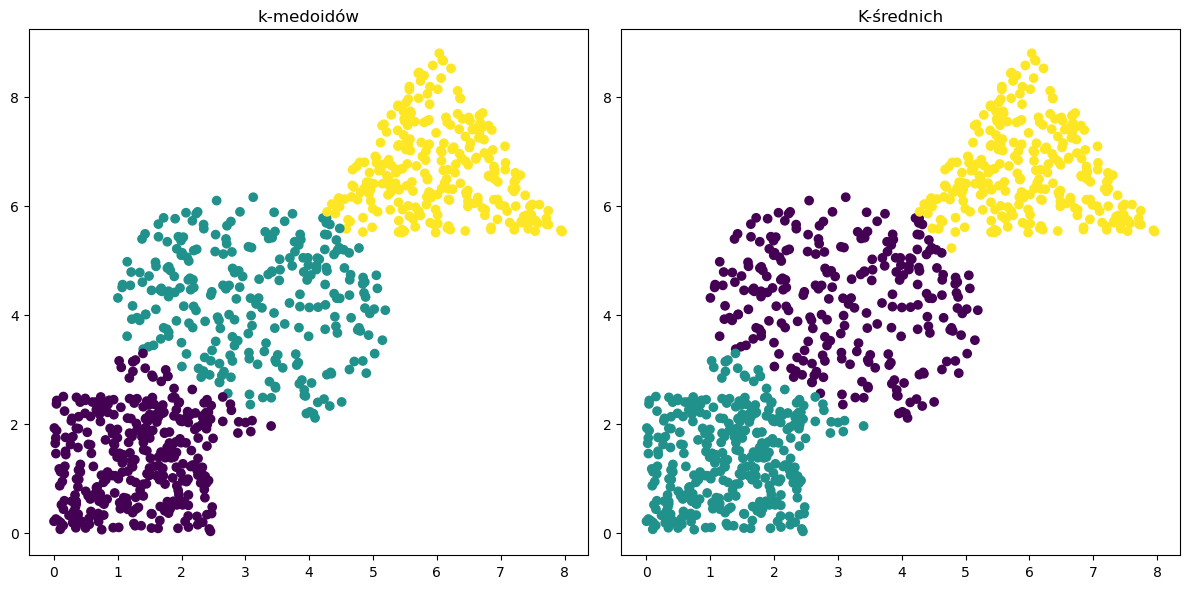

In [743]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First scatter plot for clusters_pam
ax[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters_pam, cmap='viridis')
ax[0].set_title('k-medoidów')

# Second scatter plot for kmeans.labels_
ax[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
ax[1].set_title('K-średnich')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

Obie metody poradziły sobie bardzo podobnie, jednak minimalnie lepiej wypadł algorym PAM. Do "środkowego klastra" w obu metodach zostało zaklasyfikowanych zbyt mało punktow, jednak o kilka więcej traifło z metody k-medoidów. W większej liczbie przypadków algorytm PAM poprawnie zaklasyfikował punkty graniczne.

In [752]:
medoids_pam_1, clusters_pam_1 = cluster_PAM(X, 2)

In [751]:
kmeans_1 = KMeans(n_clusters=2, random_state=17)
kmeans_1.fit(X)

KMeans(n_clusters=2, random_state=17)

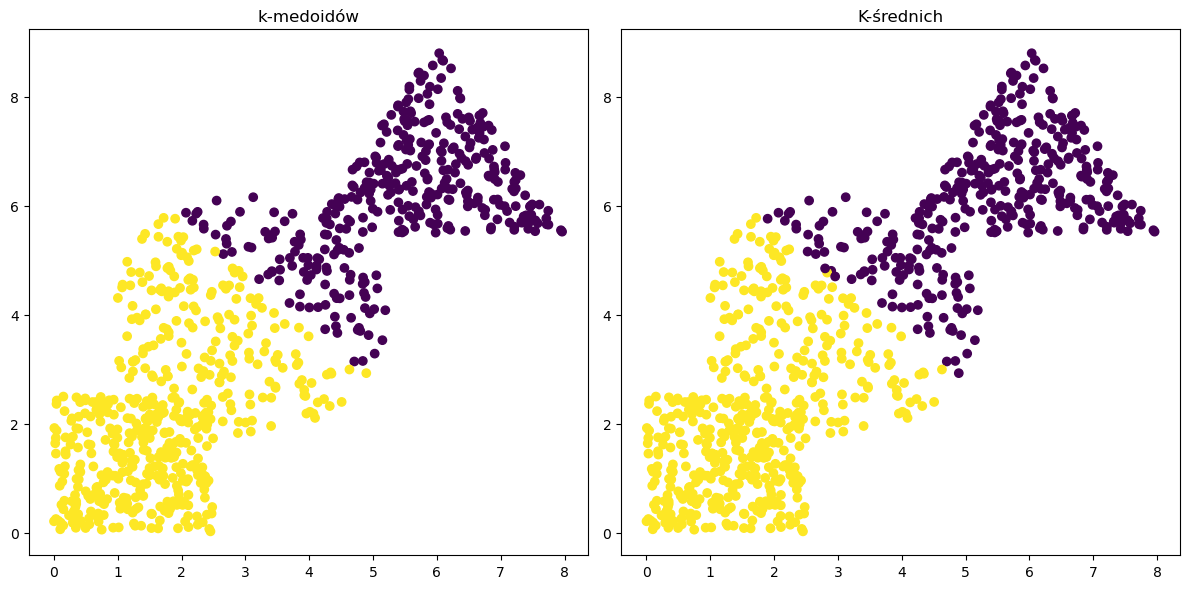

In [755]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First scatter plot for clusters_pam
ax[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters_pam_1, cmap='viridis')
ax[0].set_title('k-medoidów')

# Second scatter plot for kmeans.labels_
ax[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_1.labels_, cmap='viridis')
ax[1].set_title('K-średnich')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

W tym przypadku oba algorytmy wydzialiły klastry w niemal identyczny sposób i trudno wskazać lepszy z nich.

In [772]:
medoids_pam_11, clusters_pam_11 = cluster_PAM(X, 4)

In [773]:
kmeans_11 = KMeans(n_clusters=4, random_state=17)
kmeans_11.fit(X)

KMeans(n_clusters=4, random_state=17)

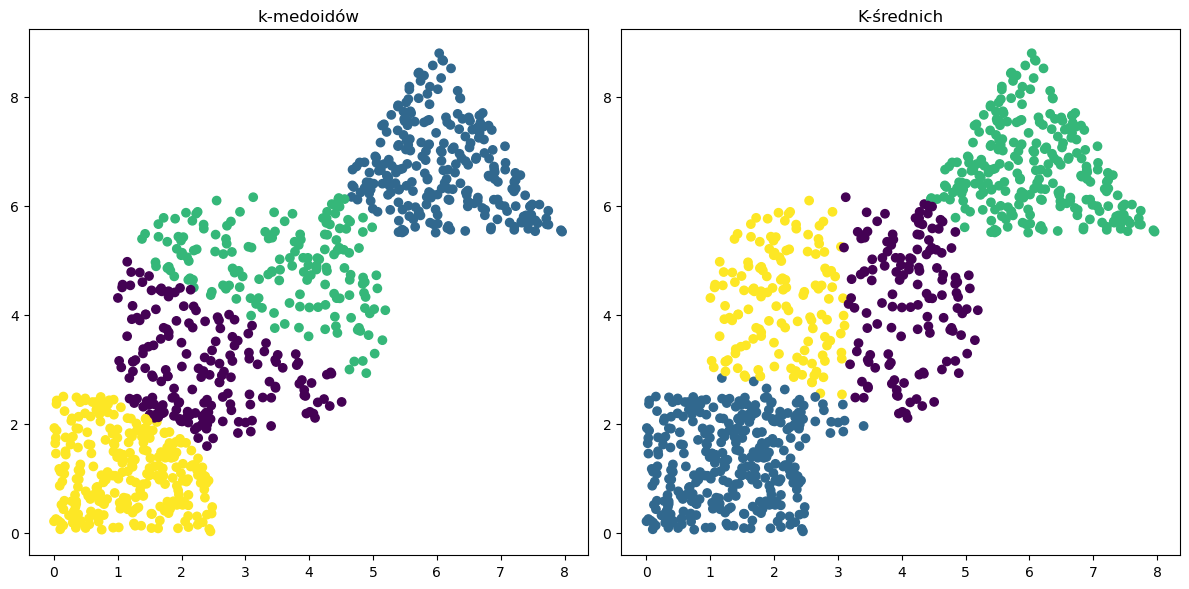

In [774]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First scatter plot for clusters_pam
ax[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters_pam_11, cmap='viridis')
ax[0].set_title('k-medoidów')

# Second scatter plot for kmeans.labels_
ax[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_11.labels_, cmap='viridis')
ax[1].set_title('K-średnich')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

Oba algrytmy podobnie zaklasyfikowały skrajne klastry, jednak pod innym kątem rozdziliły środkowy zbiór. W obu przypadkach problematyczne okazuje się przejścia z chmury punktów po lewej stronie do środkowej. Metody zaklasyfikowały je inaczej, ale obie mało poprawnie. Algorytm PAM zaklasyfikował do lewego dolnego klastra zbyt mało punktow, a metoda k-średnich zbyt dużo, dlatego trudno wskazać lepszą z nich.

# Test na wygenerowanym zbiorze Y

In [744]:
medoids_pam_2, clusters_pam_2 = cluster_PAM(Y, 2)

In [745]:
kmeans_2 = KMeans(n_clusters=2, random_state=17)
kmeans_2.fit(Y)

KMeans(n_clusters=2, random_state=17)

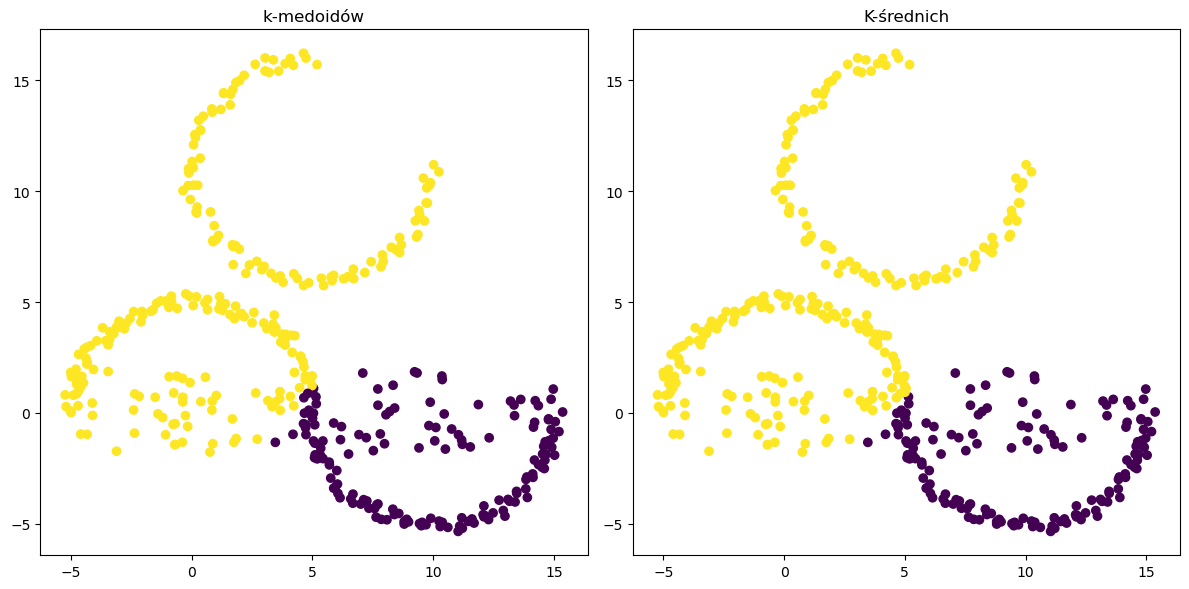

In [746]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First scatter plot for clusters_pam
ax[0].scatter(Y.iloc[:, 1], Y.iloc[:, 2], c=clusters_pam_2, cmap='viridis')
ax[0].set_title('k-medoidów')

# Second scatter plot for kmeans.labels_
ax[1].scatter(Y.iloc[:, 1], Y.iloc[:, 2], c=kmeans_2.labels_, cmap='viridis')
ax[1].set_title('K-średnich')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

Oba algorytmy potraktowały dwa półkola (górne i lewe) jako jeden klaster oraz półkole po prawej jako drugi, czyli w inny niż założony przeze mnie sposób. Ponadto klastry w obu metodach wyglądają niemal identycznie i różnią się dosłownie o kilka punktów, które przy takim wyborze klastrów równie dobrze mogą należeć do obu z nich, dlatego w tym przypadku trudno wybrać lepszy alogrytm. Z tego powodu zdecydowałem się przeprowadzić eksperyment jeszcze raz - tym razem z podziałem na 3 klastry

In [747]:
medoids_pam_3, clusters_pam_3 = cluster_PAM(Y, 3)

In [748]:
kmeans_3 = KMeans(n_clusters=3, random_state=17)
kmeans_3.fit(Y)

KMeans(n_clusters=3, random_state=17)

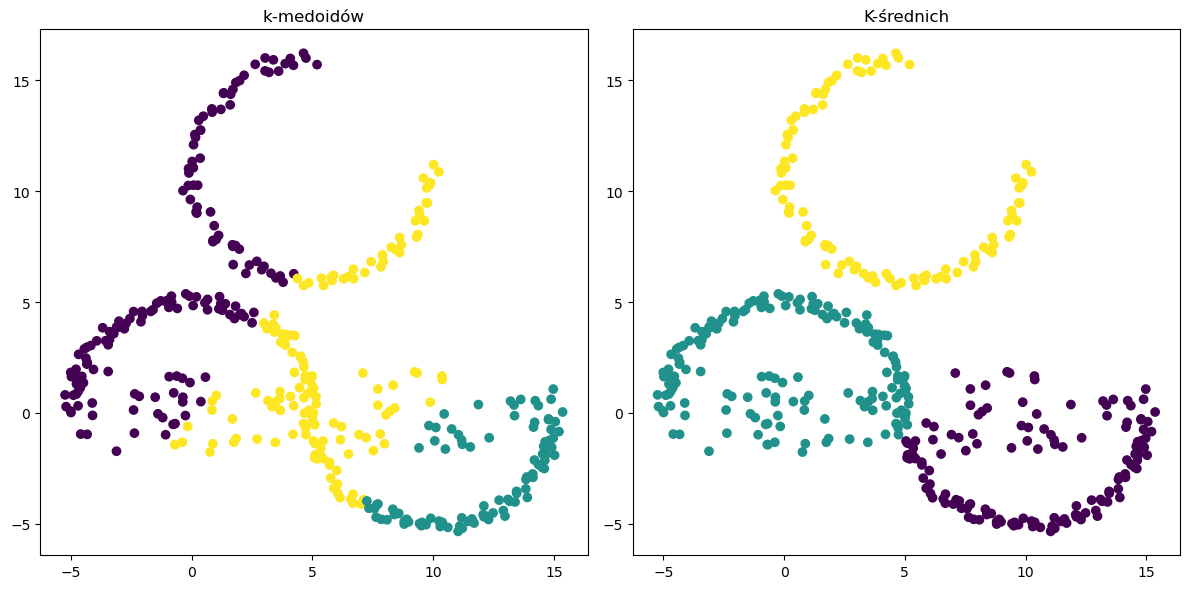

In [749]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First scatter plot for clusters_pam
ax[0].scatter(Y.iloc[:, 1], Y.iloc[:, 2], c=clusters_pam_3, cmap='viridis')
ax[0].set_title('k-medoidów')

# Second scatter plot for kmeans.labels_
ax[1].scatter(Y.iloc[:, 1], Y.iloc[:, 2], c=kmeans_3.labels_, cmap='viridis')
ax[1].set_title('K-średnich')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

W przypadku 3 klastrów na zbiorze Y lepiej wypadła metoda k-średnich, która w sensowny sposób rozdzieliła dane na 3 półkola z których były one zbudowane. Algorytm PAM podzielił dane w na część lewą, środkową i prawą, co zdaje się mało trafne w tym przypadku.

In [784]:
medoids_pam_31, clusters_pam_31 = cluster_PAM(Y,4)

In [785]:
kmeans_31 = KMeans(n_clusters=4, random_state=17)
kmeans_31.fit(Y)

KMeans(n_clusters=4, random_state=17)

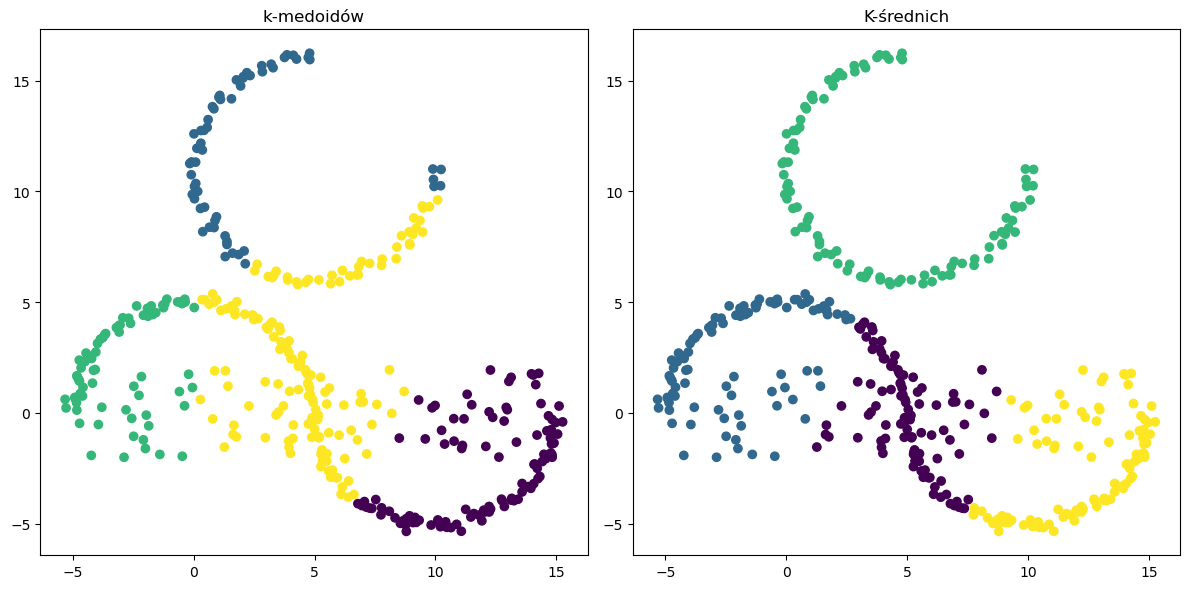

In [786]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First scatter plot for clusters_pam
ax[0].scatter(Y.iloc[:, 1], Y.iloc[:, 2], c=clusters_pam_31, cmap='viridis')
ax[0].set_title('k-medoidów')

# Second scatter plot for kmeans.labels_
ax[1].scatter(Y.iloc[:, 1], Y.iloc[:, 2], c=kmeans_31.labels_, cmap='viridis')
ax[1].set_title('K-średnich')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

W powyższym przypadku lepiej pordziła sobie metoda k-średnich. Jeden kaster utorzył do górnego pókola a dolną figurę dość symetrycznie podzelił na 3 części, co wydaje się rozsądne. Algorytm PAM nie poradził sobie dobrze z górną częścią wykresu, którą podzielił na 2 klastry. Szczególnie uwagę zwraca kilka punktów w prawym górnym rogu wykresu, które zdają się zupełnie nie pasować do klastra, w którym się znalazły.

# Czasy działania algorytmów

Jeśli chodzi o czas wykonywania algorytmów to zaimplementowany algorytm PAM działa wolniej - dla obu zbiorów potrzebował każdorazowo kilku dziesiątych sekund, podczas gdy metoda k-śrendnich za każdym razem wskazywała czas wykonania na poziomie 0.0 sekundy.

# Podsumowanie

Oba algorytmy dawały w większości przpadków dość podobne rezultaty, jednak metoda k-średnich z pakietu scikit-learn działała szybicej od zaproponowanej implementacji. Ponadto w kilku z rozpatrywanych eksperymentów poradziała sobie lepiej od algorytmu PAM. Biorąc pod uwagę te inforamcje, w przeprowadzonych testach metoda k-średnich okazała się lepsza.